In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import pandas as pd

In [30]:
# ΛCDM1: Based on H(z) calibration
cosmo1 = FlatLambdaCDM(H0=69.43, Om0=0.309)

# ΛCDM2: Based on Pantheon+ calibration
cosmo2 = FlatLambdaCDM(H0=73.6, Om0=0.334)


In [31]:
# Redshift grid from 0 to 9
z_vals = np.linspace(0.01, 9, 500)

# Distance modulus from each cosmology
mu_LCDM1 = cosmo1.distmod(z_vals).value
mu_LCDM2 = cosmo2.distmod(z_vals).value


In [54]:
cmdc = pd.read_excel("A118.xlsx")
cmdc.head()
#cmdi= cmdc[cmdc['z'] > 2.3].copy()
cmd = cmdc.sort_values('z').reset_index(drop=True)
#print(cmd)

In [55]:
cmd['z'] = pd.to_numeric(cmd['z'], errors='coerce')
cmbdall = cmd['z']
czall = np.array(cmbdall)
print(czall)

[0.3399 0.48   0.49   0.54   0.544  0.6    0.6439 0.68   0.736  0.807
 0.82   0.8969 1.063  1.16   1.17   1.21   1.24   1.29   1.3    1.368
 1.406  1.44   1.44   1.46   1.48   1.48   1.489  1.52   1.547  1.547
 1.563  1.567  1.6    1.604  1.608  1.61   1.619  1.6398 1.69   1.71
 1.73   1.73   1.758  1.77   1.8    1.8    1.822  1.95   1.9685 1.98
 2.01   2.06   2.07   2.09   2.1062 2.14   2.145  2.198  2.2    2.2
 2.22   2.27   2.296  2.3    2.33   2.346  2.4    2.43   2.433  2.452
 2.49   2.512  2.53   2.58   2.591  2.612  2.65   2.67   2.69   2.73
 2.752  2.77   2.821  2.83   2.89   2.9    3.     3.036  3.038  3.1
 3.2    3.21   3.35   3.36   3.37   3.42   3.425  3.51   3.512  3.53
 3.57   3.6    3.6    3.76   3.8    3.9    3.93   4.04   4.048  4.109
 4.35   4.5    5.     5.6    5.91   6.29   6.695  8.2   ]


In [56]:
Ep = cmd['Ep (keV)'].str.split(' ± ').str[0].astype(float)
Eperr = cmd['Ep (keV)'].str.split(' ± ').str[1].astype(float)
Sboloo = cmd['S bolo (10^-5 erg/cm^2)'].str.split(' ± ').str[0].astype(float)
Sberro = cmd['S bolo (10^-5 erg/cm^2)'].str.split(' ± ').str[1].astype(float)
Sbolo = (Sboloo*1e-5) #Bolometric flux in erg/cm^2
Sberr = (Sberro*1e-5)#Bolomrtric Flux error in erg/cm^2

In [57]:
def mu_amati(z, E_p, S_bolo, a, b, sigma_ext):
    x = np.log10(E_p / 300)
    log_Eiso = a + b * x
    Eiso = 10 ** log_Eiso
    dl_cm = np.sqrt(Eiso * (1 + z) / (4 * np.pi * S_bolo))
    dl_mpc = dl_cm / 3.085677581e24
    mu = 5 * np.log10(dl_mpc) + 25
    #sigma_mu = 5 * sigma_ext / 2
    return mu

In [58]:
pantheon = pd.read_csv("Pantheondist.csv")
print(pantheon)

         z         mu  sigma_mu
0   0.3399  41.215698  0.012055
1   0.4800  41.972170  0.017899
2   0.4900  42.013021  0.018262
3   0.5400  42.250698  0.020124
4   0.5440  42.272313  0.020303
..     ...        ...       ...
58  2.2000  46.156370  0.428504
59  2.2000  46.156370  0.428504
60  2.2200  46.162970  0.358176
61  2.2700  46.102809  0.292121
62  2.2960  46.023807  0.396172

[63 rows x 3 columns]


In [59]:
# Amati calibration values (Pantheon+)
ap = 52.502
bp = 1.106
sigma_extp = 0.440
mup = mu_amati(czall, Ep, Sbolo, ap, bp, sigma_extp)
sigma_mup = np.ones_like(mup) * 2.2

In [60]:
hubble = pd.read_csv("Hubbledist.csv")
print(hubble)

         z         mu  sigma_mu
0   0.3399  41.308201  0.189574
1   0.4800  42.193016  0.150832
2   0.4900  42.257201  0.148424
3   0.5400  42.469027  0.141901
4   0.5440  42.518748  0.139930
5   0.6000  42.760789  0.132876
6   0.6439  42.967754  0.126901
7   0.6800  43.116699  0.122986
8   0.7360  43.312657  0.118397
9   0.8070  43.566578  0.112633
10  0.8200  43.607872  0.111783
11  0.8969  43.841278  0.107222
12  1.0630  44.283307  0.099610
13  1.1600  44.517075  0.095849
14  1.1700  44.542774  0.095410
15  1.2100  44.628175  0.094128
16  1.2400  44.686954  0.093301
17  1.2900  44.791717  0.091706
18  1.3000  44.814963  0.091320
19  1.3680  44.944868  0.089466
20  1.4060  45.017742  0.088420
21  1.4400  45.085383  0.087429
22  1.4400  45.085383  0.087429
23  1.4600  45.127303  0.086802
24  1.4800  45.156816  0.086499
25  1.4800  45.156816  0.086499
26  1.4890  45.176503  0.086203
27  1.5200  45.226710  0.085636
28  1.5470  45.284092  0.084847
29  1.5470  45.284092  0.084847
30  1.56

In [65]:
# Amati calibration values Hubble
ah = 52.590
bh = 1.115
sigma_exth = 0.437
muh = mu_amati(czall, Ep, Sbolo, ah, bh, sigma_exth)
sigma_muh = np.ones_like(muh) * 2.2
for z_, mu_, sig_ in zip(czall, mup, sigma_mup):
    print(f"{z_:6.3f}  {mu_:8.3f}  {sig_:6.3f}")

 0.340    40.101   2.200
 0.480    42.142   2.200
 0.490    41.186   2.200
 0.540    41.269   2.200
 0.544    41.855   2.200
 0.600    42.128   2.200
 0.644    41.250   2.200
 0.680    40.179   2.200
 0.736    43.589   2.200
 0.807    43.641   2.200
 0.820    42.739   2.200
 0.897    43.901   2.200
 1.063    44.188   2.200
 1.160    44.702   2.200
 1.170    45.158   2.200
 1.210    42.777   2.200
 1.240    41.040   2.200
 1.290    44.770   2.200
 1.300    42.853   2.200
 1.368    43.634   2.200
 1.406    41.678   2.200
 1.440    44.319   2.200
 1.440    44.219   2.200
 1.460    43.710   2.200
 1.480    44.832   2.200
 1.480    42.761   2.200
 1.489    44.421   2.200
 1.520    42.655   2.200
 1.547    43.129   2.200
 1.547    44.834   2.200
 1.563    43.971   2.200
 1.567    43.084   2.200
 1.600    42.813   2.200
 1.604    45.108   2.200
 1.608    45.658   2.200
 1.610    44.275   2.200
 1.619    43.981   2.200
 1.640    44.214   2.200
 1.690    43.666   2.200
 1.710    46.956   2.200


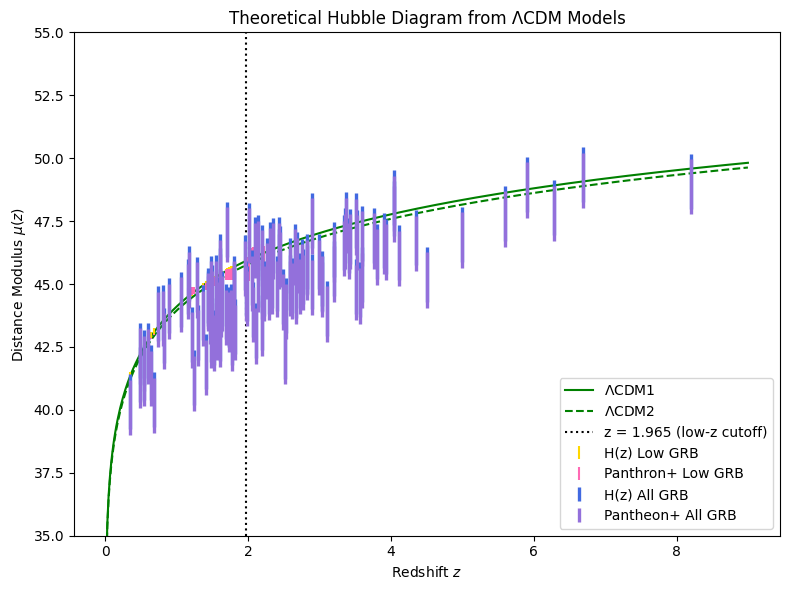

<Figure size 640x480 with 0 Axes>

In [70]:
plt.figure(figsize=(8, 6))
plt.ylim(35,55)
plt.plot(z_vals, mu_LCDM1, 'g-', label=r'$\Lambda$CDM1')
plt.plot(z_vals, mu_LCDM2, 'g--', label=r'$\Lambda$CDM2')
plt.axvline(x=1.965, color='k', linestyle=':', label='z = 1.965 (low-z cutoff)')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.errorbar(hubble['z'],hubble['mu'],yerr = hubble['sigma_mu'], fmt=' ', color='gold', label='H(z) Low GRB')
plt.errorbar(pantheon['z'],pantheon['mu'], yerr=pantheon['sigma_mu'], fmt=' ', color='hotpink', label='Panthron+ Low GRB')
plt.errorbar(czall, muh, yerr=sigmuh, fmt=' ', color='royalblue',elinewidth=2.4, label='H(z) All GRB')
plt.errorbar(czall, mup, yerr=sigmup, fmt=' ', color='mediumpurple',elinewidth=2.4, label='Pantheon+ All GRB')
plt.xlabel("Redshift $z$")
plt.ylabel("Distance Modulus $\\mu(z)$")
plt.title("Theoretical Hubble Diagram from ΛCDM Models")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Figure 3 Amati.png', dpi=300, bbox_inches='tight')